In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
df= pd.read_csv("../data/raw/phishing_1.csv")
# Read the other files
df2 = pd.read_csv("../data/raw/phishing_2.csv")
df3 = pd.read_csv("../data/raw/phishing_3.csv")
# Concatenate the dataframes
df = pd.concat([df, df2, df3])
df = df.dropna()
print(df.isna().sum())
df.head()

sender      0
receiver    0
date        0
subject     0
body        0
label       0
urls        0
dtype: int64


,sender,receiver,date,subject,body,label,urls
0,Tomas Jacobs <RickyAmes@aol.com>,the00@speedy.uwaterloo.ca,"Sun, 08 Apr 2007 21:00:48 +0300","Generic Cialis, branded quality@",\n\n\n\n\n\n\nDo you feel the pressure to perf...,1,0.0
1,Yan Morin <yan.morin@savoirfairelinux.com>,debian-mirrors@lists.debian.org,"Sun, 08 Apr 2007 12:52:30 -0400",Typo in /debian/README,"Hi, i've just updated from the gulus and I che...",0,1.0
2,Sheila Crenshaw <7stocknews@tractionmarketing....,the00@plg.uwaterloo.ca,"Sun, 08 Apr 2007 17:12:19 +0000",authentic viagra,Mega authenticV I A G R A $ DISCOUNT priceC...,1,1.0
3,Stormy Dempsey <vqucsmdfgvsg@ruraltek.com>,opt4@speedy.uwaterloo.ca,"Sun, 08 Apr 2007 17:15:47 -0100",Nice talking with ya,"\nHey Billy, \n\nit was really fun going out t...",1,1.0
4,"""Christi T. Jernigan"" <dcube@totalink.net>",ktwarwic@speedy.uwaterloo.ca,"Sun, 08 Apr 2007 19:19:07 +0200",or trembling; stomach cramps; trouble in sleep...,"\nsystem"" of the home. It will have the capab...",1,0.0


In [13]:
email_type_counts = df['body'].value_counts()
label_counts = df['label'].value_counts()
print(len(email_type_counts))
print(len(label_counts))

91737
2


In [14]:
# Clean the data
df = df.drop_duplicates()
df = df.dropna()
# Select the columns to keep
df = df[['body', 'label']]
# Save new df to csv
# df.to_csv("../data/processed/phishing_train_1.csv", index=False)

In [15]:
df4 = pd.read_csv("../data/raw/phishing_emails.csv")
df4 = df4.dropna()
print(df4.isna().sum())
df4.head()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [16]:
# Select the columns to keep
df4 = df4[['Email Text', 'Email Type']]
# Rename the columns
df4 = df4.rename(columns={'Email Text': 'body', 'Email Type': 'label'})
df4.head()

,body,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [17]:
# map labels to 0 and 1
df4['label'] = df4['label'].map({'Safe Email': 0, 'Phishing Email': 1})
df4.head()

,body,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1


Number of phishing emails: 50558
Number of non-phishing emails: 41179


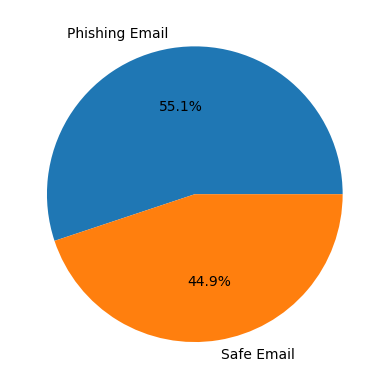

In [18]:
# Compare how many phishing emails and non-phishing emails
phishing_emails = df[df['label'] == 1]
non_phishing_emails = df[df['label'] == 0]
print(f"Number of phishing emails: {len(phishing_emails)}")
print(f"Number of non-phishing emails: {len(non_phishing_emails)}")
# Make a pie chart of the number of phishing emails and non-phishing emails
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['Phishing Email', 'Safe Email'], autopct='%1.1f%%')
plt.show()

Number of phishing emails: 7312
Number of non-phishing emails: 11322


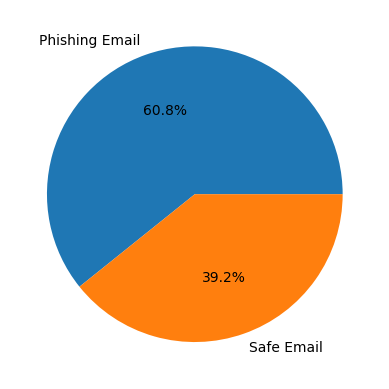

In [19]:
# Compare how many phishing emails and non-phishing emails
phishing_emails = df4[df4['label'] == 1]
non_phishing_emails = df4[df4['label'] == 0]
print(f"Number of phishing emails: {len(phishing_emails)}")
print(f"Number of non-phishing emails: {len(non_phishing_emails)}")
# Make a pie chart of the number of phishing emails and non-phishing emails
import matplotlib.pyplot as plt
plt.pie(df4['label'].value_counts(), labels=['Phishing Email', 'Safe Email'], autopct='%1.1f%%')
plt.show()

In [20]:
# Seperate the data into training and testing data
train_data, test_data = train_test_split(df, test_size=0.01, random_state=42)
print(f"Number of training data: {len(train_data)}")
print(f"Number of testing data: {len(test_data)}")

# Save the training and testing data to csv
train_data.to_csv("../data/local/phishing_train_1.csv", index=False)
test_data.to_csv("../data/local/phishing_test_1.csv", index=False)

train_data, test_data = train_test_split(df4, test_size=0.02, random_state=42)
print(f"Number of training data: {len(train_data)}")
print(f"Number of testing data: {len(test_data)}")
# Save the training and testing data to csv
train_data.to_csv("../data/local/phishing_train_2.csv", index=False)
test_data.to_csv("../data/local/phishing_test_2.csv", index=False)

Number of training data: 90819
Number of testing data: 918
Number of training data: 18261
Number of testing data: 373
